In [45]:
import sys
import torch
import torch.nn as nn
from PIL import Image

import glob
import numpy as np
import torchvision.transforms as transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model=torchvision.models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features,4,bias=False)
model.to(device)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [19]:
import torchvision

In [14]:
checkpoint = torch.load('checkpoint/resnet152.net-ckpt.t7')
net = checkpoint['net']
acc = checkpoint['acc']
print("The current model accuracy is:",checkpoint["acc"])
images_path="test"
transform = transforms.Compose([transforms.Resize((224,224))])

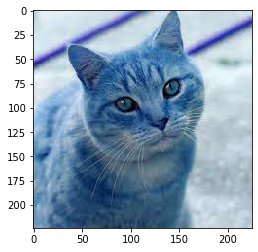

In [46]:
import cv2
from PIL import Image
import numpy
import matplotlib.pyplot as plt
image = Image.open("test/download.png")
image.show()
img = cv2.cvtColor(numpy.asarray(image),cv2.COLOR_RGB2BGR)
plt.imshow(img)
plt.show()

In [47]:
import cv2
def predict():
    true_labels=[]
    output_labels=[]
    for image in glob.glob(images_path+"/*.png"):
        print(image)
        true_labels.append(3)
        #image=Image.open(image)
        #image=image.resize((224,224))
        image=cv2.imread(image)
        image=cv2.resize(image,(224,224))
        image = Image.fromarray(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
        #print(np.array(image).shape)
        tensor=torch.from_numpy(np.asarray(image)).permute(2,0,1).float()/255.0
        tensor=tensor.reshape((1,3,224,224))
        tensor=tensor.to(device)
        #print(tensor.shape)
        output=model(tensor)
        print(output)
        _, pred = torch.max(output.data,1)
        output_labels.append(pred.item())
    return true_labels,output_labels

In [48]:
true_labels,output_labels=predict()
print("The correct label is:")
print(true_labels)
print("The predicted label is:")
print(output_labels)

test/download.png
tensor([[-0.4366, -0.1079, -0.1912,  0.3534]], device='cuda:0',
       grad_fn=<MmBackward0>)
The correct label is:
[3]
The predicted label is:
[3]
